In [26]:
import matplotlib.pyplot as plt
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=8, n_informative=3)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=3)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 3)


In [22]:
X.shape

(100, 8)

In [61]:
print(X_selected[:5,])
print(X[:5,])

[[ 1.53071205  1.42032896  0.38990994]
 [ 0.00550345  0.42696187 -0.97611273]
 [ 0.61627591 -1.14064307  0.46539655]
 [ 0.27812733  1.6055937   1.17400148]
 [ 0.16662729  1.40529401 -0.40572507]]
[[ 1.53071205  0.68951395  1.42032896 -0.51971582 -0.81191942 -1.39110605
   0.38990994  1.74199995]
 [ 0.00550345 -0.58789695  0.42696187  0.63991451 -0.42109811  0.19515816
  -0.97611273  0.23199403]
 [ 0.61627591 -0.37356404 -1.14064307 -0.60869207  0.09184125  0.8770094
   0.46539655  1.0681872 ]
 [ 0.27812733  0.80929665  1.6055937  -0.50299981 -0.34590975  0.84707237
   1.17400148  0.3824576 ]
 [ 0.16662729 -0.61011746  1.40529401 -0.86617967  0.36778187 -0.09468222
  -0.40572507  1.84022922]]


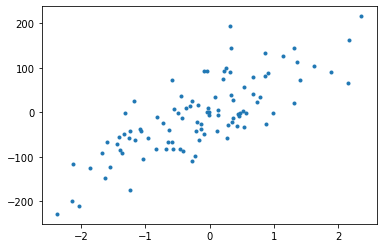

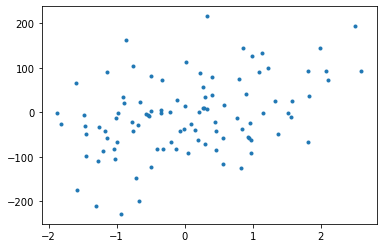

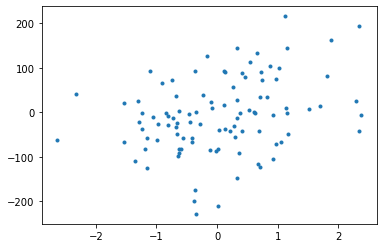

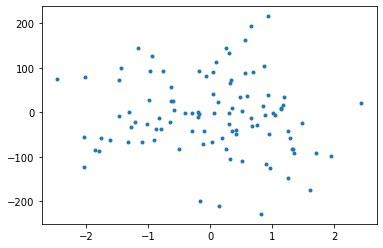

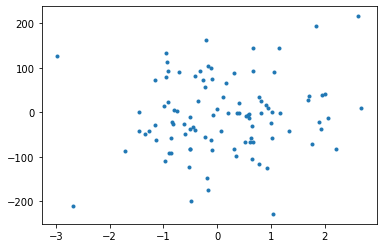

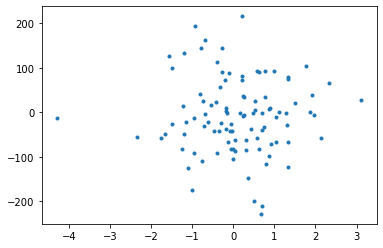

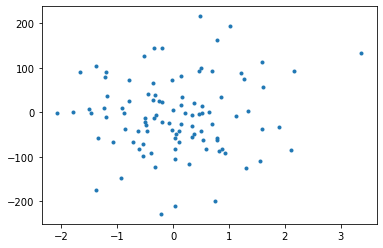

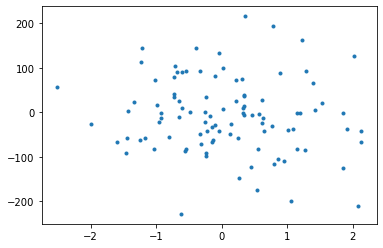

In [17]:
for i in range(X.shape[1]):
    plt.scatter(X[:,i], y, marker='.',)
    plt.show()

In [43]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
from numpy import mean, std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores_1 = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv)
n_scores_2 = cross_val_score(model, X_selected, y, scoring='neg_root_mean_squared_error', cv=cv)
# report performance
print('Mean neg rmse All: %.3f (%.3f)' % (mean(n_scores_1), std(n_scores_1)))
print('Mean neg rmse Selected: %.3f (%.3f)' % (mean(n_scores_2), std(n_scores_2)))

Mean neg rmse All: -49.613 (11.526)
Mean neg rmse Selected: -39.774 (8.969)


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

model1 = model
model2 = model
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
model1.score(X_test,y_test)

0.69334795207519

In [134]:
X_train2 = X_train[:,[0,2,6]]
X_test2 = X_test[:,[0,2,6]]
model2.fit(X_train2, y_train)
y_pred2 = model2.predict(X_test2)
model2.score(X_test2, y_test)

0.7519867046601639

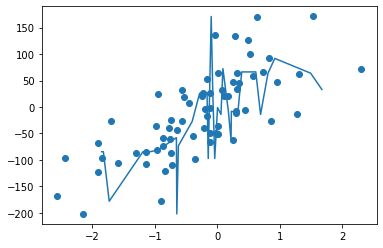

In [135]:
import numpy as np

comb =np.concatenate((X_test, np.reshape(y_pred1,(30,1))), axis=1)
Xy = comb[np.argsort(comb[:,0])]
plt.scatter(X_train[:,0], y_train)
plt.plot(Xy[:,0],Xy[:,8])

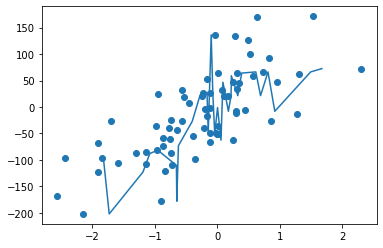

In [136]:
comb2 = np.concatenate((X_test2, np.reshape(y_pred2,(30,1))), axis=1)
Xy2 = comb2[np.argsort(comb2[:,0])]

plt.scatter(X_train2[:,0], y_train)

plt.plot(Xy2[:,0], Xy2[:,3])

(array([ 0.20886407,  0.46503484, 62.83296544,  0.50808528,  1.27983995,
        30.84651408,  2.28808235, 44.53667367]),
 array([6.48670637e-01, 4.96888838e-01, 3.63478914e-12, 4.77662702e-01,
        2.60689623e-01, 2.39501513e-07, 1.33589173e-01, 1.50109166e-09]))